In [ ]:
**NAME**: Raymond Shum

**CLASS**: CST383-30_SP22

**ASSIGNMENT**: W4, Lab 3 - Bad Data

**DUE DATE**: Feb. 1, 2022

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the very useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('notebook')   
# sns.set_context('paper')  # smaller
# sns.set_context('talk')   # larger

# change default plot size
rcParams['figure.figsize'] = 9,7

1. Create an Python file in Spyder, and enter this code to read the data:
infile = https://raw.githubusercontent.com/grbruns/cst383/master/campaign-ca-2016-sample.csv (Links to an external site.)
df = pd.read_csv(infile)
Record your work on the following problems in your Python file.

In [2]:
infile = "https://raw.githubusercontent.com/grbruns/cst383/master/campaign-ca-2016-sample.csv"
df = pd.read_csv(infile)

2. Look at some of the data using the variable explorer in the upper right pane of Spyder. (Select the 'Variable explorer' tab and double click on 'df'.)

In [ ]:
# I'm using Jupyter for this lab.

3. Look at the type of each column in df.  (We'll sometimes refer to the columns as 'variables', 'attributes', or 'features'.)  How many columns are shown as numeric?  Do you think some of the columns should be numeric but aren't?

In [3]:
# There are two numeric columns, but the majority should be.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cmte_id            20000 non-null  object 
 1   cand_id            20000 non-null  object 
 2   cand_nm            20000 non-null  object 
 3   contbr_nm          20000 non-null  object 
 4   contbr_city        20000 non-null  object 
 5   contbr_st          20000 non-null  object 
 6   contbr_zip         20000 non-null  object 
 7   contbr_employer    18792 non-null  object 
 8   contbr_occupation  19822 non-null  object 
 9   contb_receipt_amt  20000 non-null  float64
 10  contb_receipt_dt   20000 non-null  object 
 11  receipt_desc       406 non-null    object 
 12  memo_cd            619 non-null    object 
 13  memo_text          7809 non-null   object 
 14  form_tp            20000 non-null  object 
 15  file_num           20000 non-null  int64  
 16  tran_id            200

4. Which of the columns contain NA values?  Use Python to figure out the total number of NA values in the data set. 

In [5]:
df.isna().sum()

cmte_id                  0
cand_id                  0
cand_nm                  0
contbr_nm                0
contbr_city              0
contbr_st                0
contbr_zip               0
contbr_employer       1208
contbr_occupation      178
contb_receipt_amt        0
contb_receipt_dt         0
receipt_desc         19594
memo_cd              19381
memo_text            12191
form_tp                  0
file_num                 0
tran_id                  0
election_tp             11
dtype: int64

In [6]:
df.isna().sum().sum()

52563

5. Can you find values (besides 'nan') that indicate missing data?  You can try doing this with Python or by searching manually through df.  High-level hint: you might expect an NA value in a column to appear many times.

In [35]:
# Collect names of relevant columns
# look through value_counts for each column and see if there are categories indicating null info
c = df.columns
res = [df[col].value_counts() for col in c]
# Look at each column in variable explorer or plot

6. Does missing data exist in attribute contbr_employer?  If so, how is it encoded?  Would it make sense to change it?

In [62]:
df['contbr_employer'].isna().sum() > 1

True

7. Look more at contbr_employer.  Do you see any other data quality issues?

In [63]:
# Huge number of unique values
df['contbr_employer'].value_counts()

RETIRED                              3419
NOT EMPLOYED                         2305
SELF-EMPLOYED                        1206
SELF                                 1057
SELF EMPLOYED                         625
                                     ... 
SCREEN ENGINE LLC                       1
RANGEN INC. BUHL IDAHO                  1
WALT DISNEY STUDIOS                     1
THE REHAB CENTER OF BEVERLY HILLS       1
BEYOND SECURITY                         1
Name: contbr_employer, Length: 5258, dtype: int64

In [67]:
# This is probably the most descriptive
df['contbr_employer'].value_counts().loc[:"NONE"]

# Can probably combined Self-Employed, Self and Self Employed
# Other non null values can probably be combined to be employed
# need to go over more common values

RETIRED          3419
NOT EMPLOYED     2305
SELF-EMPLOYED    1206
SELF             1057
SELF EMPLOYED     625
NONE              606
Name: contbr_employer, dtype: int64

8. How many different values are there in attribute ‘memo_cd’?  What are the values?  What fraction of the values are empty?

In [73]:
df['memo_cd'].value_counts()

X    619
Name: memo_cd, dtype: int64

In [75]:
df['memo_cd'].isnull().sum() / len(df['memo_cd'])

0.96905

9. Attribute ‘contb_receipt_amt’ is the amount of the contribution.  Produce a histogram of the values.  Be sure your plot has a good title and good axis labels.

Text(0, 0.5, 'Count')

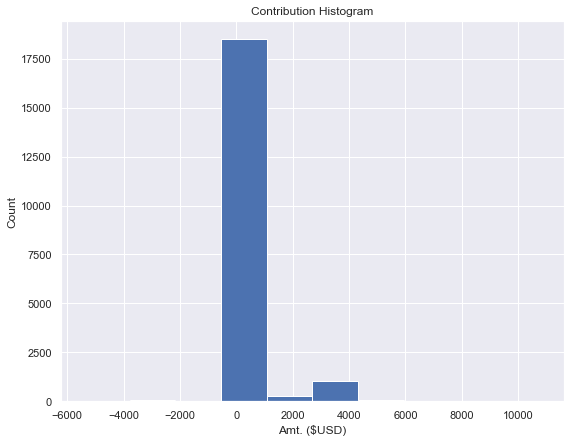

In [89]:
df['contb_receipt_amt'].plot(kind='hist')
plt.title('Contribution Histogram')
plt.xlabel('Amt. ($USD)')
plt.ylabel('Count')

10. What is the range of ‘contb_receipt_amt’ values?  Do any of them look suspicious?  How should you deal with negative campaign contributions?  Do negative contributions tend to be paired with positive contributions?

In [90]:
# There are negative values
df.describe()

,contb_receipt_amt,file_num
count,20000.000000,2.000000e+04
mean,272.404752,1.042429e+06
std,738.984362,1.018850e+04
min,-5400.000000,1.003942e+06
25%,25.000000,1.032443e+06
50%,50.000000,1.046975e+06
75%,100.000000,1.051507e+06
max,10800.000000,1.051624e+06


11. Attribute contbr_zip has the zip code of a contributor.  Are all zip codes in the same format?  If not, do you think it would be appropriate to process the zip code data?

In [108]:
df['contbr_zip'].str.len().value_counts()

9    19402
5      598
Name: contbr_zip, dtype: int64

In [109]:
df['contbr_zip'].head(10)

0    900243119
1    916042020
2    922344815
3    905012518
4    945494640
5    920818643
6    926482986
7    941024127
8    930012464
9    940273414
Name: contbr_zip, dtype: object

In [113]:
# huge number of unique values
len(df['contbr_zip'].unique())

13710

In [ ]:
# Maybe just convert them to 5 digit zips
# Further aggregate around locality using zip
# City, Zip, State should be highly correlated, maybe decide which columns to drop

12. Create a histogram of the lengths of contbr_employer values (i.e., the length of the values as strings).  Is the distribution unusual?  Give an explanation, based on working with the data, of why some employer length values seem to be very popular.

<AxesSubplot:>

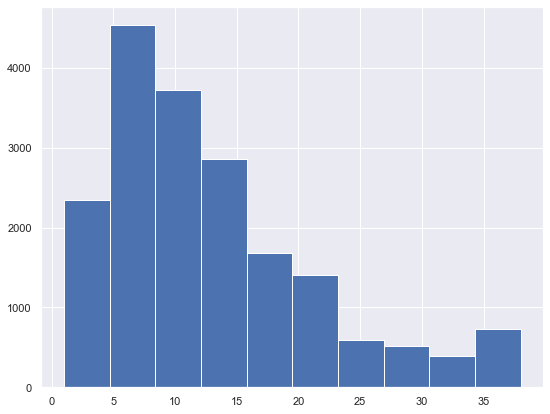

In [114]:
df['contbr_employer'].str.len().hist()

In [ ]:
# There are common labels such as "SELF" and "Retired" used to group employees

13. If we scale a vector of numeric values using 0-1 scaling, then the smallest value in the vector will become 0, the largest will become 1, and the others will be scaled linearly between 0 and 1.  Create a new attribute, s_amt1, from ‘contb_receipt_amt’ by using 0-1 scaling. 

In [115]:
col_min = df['contb_receipt_amt'].min()
col_max = df['contb_receipt_amt'].max()
df['amt_scaled'] = (df['contb_receipt_amt'] - col_min) / (col_max - col_min)

14. What do memo_cd values mean?  How do they relate to the values in ‘memo_text’?  Note: an "earmarked" contribution is one that's not given directly to a candidate but marked to indicate the candidate to which the contribution will be given.

In [140]:
df[['memo_cd','memo_text']][~df['memo_cd'].isnull()].value_counts()[:5]

memo_cd  memo_text                 
X        * HILLARY VICTORY FUND        305
         REDESIGNATION FROM PRIMARY     83
         REDESIGNATION TO GENERAL       67
         REATTRIBUTION FROM SPOUSE      31
         REATTRIBUTION TO SPOUSE        31
dtype: int64

In [139]:
df[df['memo_cd'].isnull() & ~df['memo_text'].isnull()]['memo_text'].value_counts()[:5]

* EARMARKED CONTRIBUTION: SEE BELOW                    7122
EARMARKED FROM MAKE DC LISTEN                            64
SEE REATTRIBUTION                                        23
REATTRIBUTION / REDESIGNATION REQUESTED                  19
REATTRIBUTION / REDESIGNATION REQUESTED (AUTOMATIC)      10
Name: memo_text, dtype: int64

15. If you still have time, try some of the other methods discussed in the lecture for finding and fixing bad data.

16. If you still have time, try creating a new attribute s_am2 from the same attribute by using Z-score normalization.  In Z-score normalization of a numeric vector, the mean value in the vector will become 0, a value 1 standard deviation about the mean will become 1, a value 1 standard deviation below the mean will become -1, etc.